<a href="https://colab.research.google.com/github/TheJoys2019/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Artin%20Sinani%20-%20LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [2]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [3]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [4]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [5]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [6]:
# TODO - during class, but please help!

lambda_heights = [72,72,77,72,73,67,64,58,63,78]

import pandas as pd
df = pd.DataFrame({'heights': lambda_heights})
df.head()

,heights
0,72
1,72
2,77
3,72
4,73


In [7]:
df.heights.mean()

69.6

In [8]:
import random

population = []

for _ in range(1000):
  population.append(random.randint(0,1))
  
print(population)

[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 

In [9]:
sample = random.sample(population, 100)
print(sample)
print(len(sample))

[0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]
100


In [10]:
df = pd.DataFrame({"likes_coke": sample})
df.head()

df.likes_coke.mean()

0.52

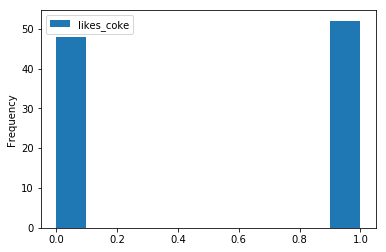

In [11]:
df.plot.hist();

In [12]:
df.likes_coke.describe()

count    100.000000
mean       0.520000
std        0.502117
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: likes_coke, dtype: float64

In [13]:
import numpy as np

def mean(list):
  average = np.sum(list)/len(list)
  return average

print("Population Mean:", mean(population))
print("Sample Mean:", mean(sample))

Population Mean: 0.495
Sample Mean: 0.52


In [14]:
def variance(list):
  n = len(list)
  return np.sum((list - mean(list))**2)/(n-1)

variance(df.likes_coke)

0.2521212121212121

In [15]:
def stddev(list):
  var = variance(list)
  return var**(1/2)

stddev(df.likes_coke)

0.5021167315686782

<img src="https://www.ahajournals.org/cms/attachment/850f8023-e028-4694-a946-bbdbdaa9009b/15mm6.jpg"  width='200'/>

In [16]:
n = len(df.likes_coke)
t_stat = (mean(df.likes_coke) - .5)/(stddev(df.likes_coke)/n**(1/2))
print(t_stat)

0.39831375340784614


In [17]:
# dir (scipy.stats)
from scipy import stats

scipy.stats.ttest_lsamp(df['likes_coke'], .5)

NameError: ignored

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [23]:
{'0':'Political Party', '1':'handicapped-infants',
                                       '2':'water-project-cost-sharing', '3':'adoption-of-the-budget-resolution',
                                      '4':'physician-fee-freeze', '5':'el-salvador-aid', '6':'religious-groups-in-schools',
                                      '7':'anti-satellite-test-ban', '8':'aid-to-nicaraguan-contras'}

{'0': 'Political Party',
 '1': 'handicapped-infants',
 '2': 'water-project-cost-sharing',
 '3': 'adoption-of-the-budget-resolution',
 '4': 'physician-fee-freeze',
 '5': 'el-salvador-aid',
 '6': 'religious-groups-in-schools',
 '7': 'anti-satellite-test-ban',
 '8': 'aid-to-nicaraguan-contras'}

In [25]:
# TODO - your code here!


# Load and Clean

import pandas as pd
from scipy import stats
import numpy as np

votes = pd.read_csv('https://raw.githubusercontent.com/TheJoys2019/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/master/house-votes-84.data', header=None,
                 names=('Political Party', 
                        'handicapped-infants',
                        'water-project-cost-sharing',
                        'adoption-of-the-budget-resolution',
                        'physician-fee-freeze',
                        'el-salvador-aid',
                        'religious-groups-in-schools',
                        'anti-satellite-test-ban',
                        'aid-to-nicaraguan-contras', 
                        'mx-missile', 
                        'immigration',
                        'synfuels-corporation-cutback',
                        'education-spending', 
                        'superfund-right-to-sue',
                        'crime',
                        'duty-free-exports',
                        'export-administration-act-south-africa'))
votes.head()


,Political Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [26]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
Political Party                           435 non-null object
handicapped-infants                       435 non-null object
water-project-cost-sharing                435 non-null object
adoption-of-the-budget-resolution         435 non-null object
physician-fee-freeze                      435 non-null object
el-salvador-aid                           435 non-null object
religious-groups-in-schools               435 non-null object
anti-satellite-test-ban                   435 non-null object
aid-to-nicaraguan-contras                 435 non-null object
mx-missile                                435 non-null object
immigration                               435 non-null object
synfuels-corporation-cutback              435 non-null object
education-spending                        435 non-null object
superfund-right-to-sue                    435 non-null object
crime                      

In [27]:
# replacing values with numeric
# no = 1
# yes = 0

votes.replace(('n','y', '?'),(1,0, np.NaN), inplace=True)

votes.head(10)

,Political Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0
1,republican,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN
2,democrat,NaN,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,democrat,1.0,0.0,0.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,democrat,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0
5,democrat,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
6,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0
7,republican,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0
8,republican,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
9,democrat,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [28]:
votes['Political Party'].value_counts()

democrat      267
republican    168
Name: Political Party, dtype: int64

In [0]:
votes = votes.sort_values(by='Political Party')

In [30]:
votes.head()

,Political Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
370,democrat,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0
200,democrat,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
199,democrat,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,0.0,1.0,1.0,1.0,0.0,NaN
198,democrat,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,0.0,NaN
196,democrat,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN


In [31]:
votes.isna().sum()

Political Party                             0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [0]:
dems = votes.head(267)
reps = votes.tail(168)

In [33]:
dems.describe().T['mean']

handicapped-infants                       0.395349
water-project-cost-sharing                0.497908
adoption-of-the-budget-resolution         0.111538
physician-fee-freeze                      0.945946
el-salvador-aid                           0.784314
religious-groups-in-schools               0.523256
anti-satellite-test-ban                   0.227799
aid-to-nicaraguan-contras                 0.171103
mx-missile                                0.241935
immigration                               0.528517
synfuels-corporation-cutback              0.494118
education-spending                        0.855422
superfund-right-to-sue                    0.710317
crime                                     0.649805
duty-free-exports                         0.362550
export-administration-act-south-africa    0.064865
Name: mean, dtype: float64

In [34]:
reps.describe().T['mean']

handicapped-infants                       0.812121
water-project-cost-sharing                0.493243
adoption-of-the-budget-resolution         0.865854
physician-fee-freeze                      0.012121
el-salvador-aid                           0.048485
religious-groups-in-schools               0.102410
anti-satellite-test-ban                   0.759259
aid-to-nicaraguan-contras                 0.847134
mx-missile                                0.884848
immigration                               0.442424
synfuels-corporation-cutback              0.867925
education-spending                        0.129032
superfund-right-to-sue                    0.139241
crime                                     0.018634
duty-free-exports                         0.910256
export-administration-act-south-africa    0.342466
Name: mean, dtype: float64

In [0]:
import scipy
import scipy.stats

In [0]:
def double_tea_test(prob):
  two_sided = scipy.stats.ttest_ind
  demos = dems[prob]
  repos = reps[prob]
  
  stat = two_sided(demos,repos, nan_policy='omit')
  
  return stat

In [38]:
print(double_tea_test('handicapped-infants'))

Ttest_indResult(statistic=-9.205264294809224, pvalue=1.6134403279371972e-18)


In [42]:
print(double_tea_test('water-project-cost-sharing'))

Ttest_indResult(statistic=0.0889653813786818, pvalue=0.9291556823993485)


In [43]:
print(double_tea_test('adoption-of-the-budget-resolution'))

Ttest_indResult(statistic=-23.21277691701378, pvalue=2.0703402795404463e-77)


In [44]:
print(double_tea_test('physician-fee-freeze'))

Ttest_indResult(statistic=49.36708157301406, pvalue=1.994262314074344e-177)


In [45]:
print(double_tea_test('el-salvador-aid'))

Ttest_indResult(statistic=21.13669261173219, pvalue=5.600520111729011e-68)


# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars